In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nikhil1e9_loan_default_path = kagglehub.dataset_download('nikhil1e9/loan-default')

print('Data source import complete.')


100%|██████████| 7.86M/7.86M [00:01<00:00, 7.87MB/s]

Extracting files...


Data source import complete.


**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> LOAN DEFAULT CLASSIFICATION & PREDICTION</span> </center>**

# 1. Introduction

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>

<span style="font-size:16px;">Banks and other financial institutions play a crucial role in the economy by providing loans to individuals and businesses. However, a significant risk for these institutions is loan default, where borrowers fail to repay their loans. To mitigate this risk, financial institutions increasingly leverage machine learning to predict loan defaults and make informed lending decisions.</span>

<h2>Project Goals</h2>
<span style="font-size:16px;">This project aims to build a machine learning model that can accurately predict loan defaults. This model will help financial institutions:</span>
<ul>
  <li><strong>Identify High-Risk Borrowers:</strong> By predicting the likelihood of default, lenders can identify borrowers who may pose a higher risk. This allows for early intervention and potentially prevents defaults altogether.</li>
  <li><strong>Implement Targeted Interventions:</strong> Once high-risk borrowers are identified, lenders can implement targeted strategies such as loan restructuring or financial counseling to help them repay their loans.</li>
  <li><strong>Make Informed Loan Decisions:</strong> The model's predictions will inform loan decisions, potentially reducing the overall risk exposure for financial institutions.</li>
</ul>

<h2>Data Acquisition</h2>
<p>We will be using a loan default prediction dataset from Kaggle <a href="https://www.kaggle.com/c/loan-default-prediction">here</a>. This dataset was originally from Coursera: <a href="https://www.coursera.org/projects/data-science-coding-challenge-loan-default-prediction?action=enroll">here</a>. The data provides a sufficient number of data points to train and build a robust machine learning model.</p>

<h2>Model Development</h2>
<p>Our goal is to build a binary classification model that can predict whether a borrower will default on their loan (1) or not (0). We will explore various machine learning algorithms to develop a model with high accuracy and interpretability.</p>
<p>This project will be documented in this Jupyter Notebook, outlining the entire process from data exploration and cleaning to model building, evaluation, and deployment (if applicable).</p>

<span style="font-size:16px;">LET'S GET STARTED</span>


</body>
</html>

# 2. Loading libraries and data

In [44]:
# Importing the Neccessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc)

from sklearn.neighbors import NearestCentroid
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
import time
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Loading the Dataframe

data = pd.read_csv("/Loan_default.csv")
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

# 3. Undertanding the data: Exploratory Data Analysis [EDA]

In [6]:
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [7]:
data.tail()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
255342               4         14.11        12      0.85   Bachelor's   
255343               2         11.55        24      0.21  High School   
255344               3          5.29        60      0.50  High School   
255345               1         20.90        48      0.44  High School   
255346               2          6.73        12      0.48   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
255342      Full-time       Married          No            No       Other   
255343      Part-time      Divorced          No            No        Home   
255344  Self-employed       Married         Yes           Yes        Auto   
255345      Part-time        Single         Yes           Yes       Other   
255346     Unemployed      Divorced         Yes            No   Education   

       HasCoSigner  Default  
255342          No        0  
255343          No        1  
255344         Yes        0  
255345          No        0  
255346         Yes        0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
data.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

In [10]:
data.shape

(255347, 18)

In [11]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [12]:
data.duplicated().sum()

0

**Observation:**

* It appears that our data does not have any null values
* Neither are there any duplicated values in our data sets

In [13]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [14]:
data.columns.values

array(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'], dtype=object)

In [16]:
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']


numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore',
                     'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

In [17]:
# Checking for Errors in Categorical Variables:

for variable in categorical_variables:
    print(data[variable].value_counts())
    print("~"*50)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: i

# 4. Data Distribution Visualization

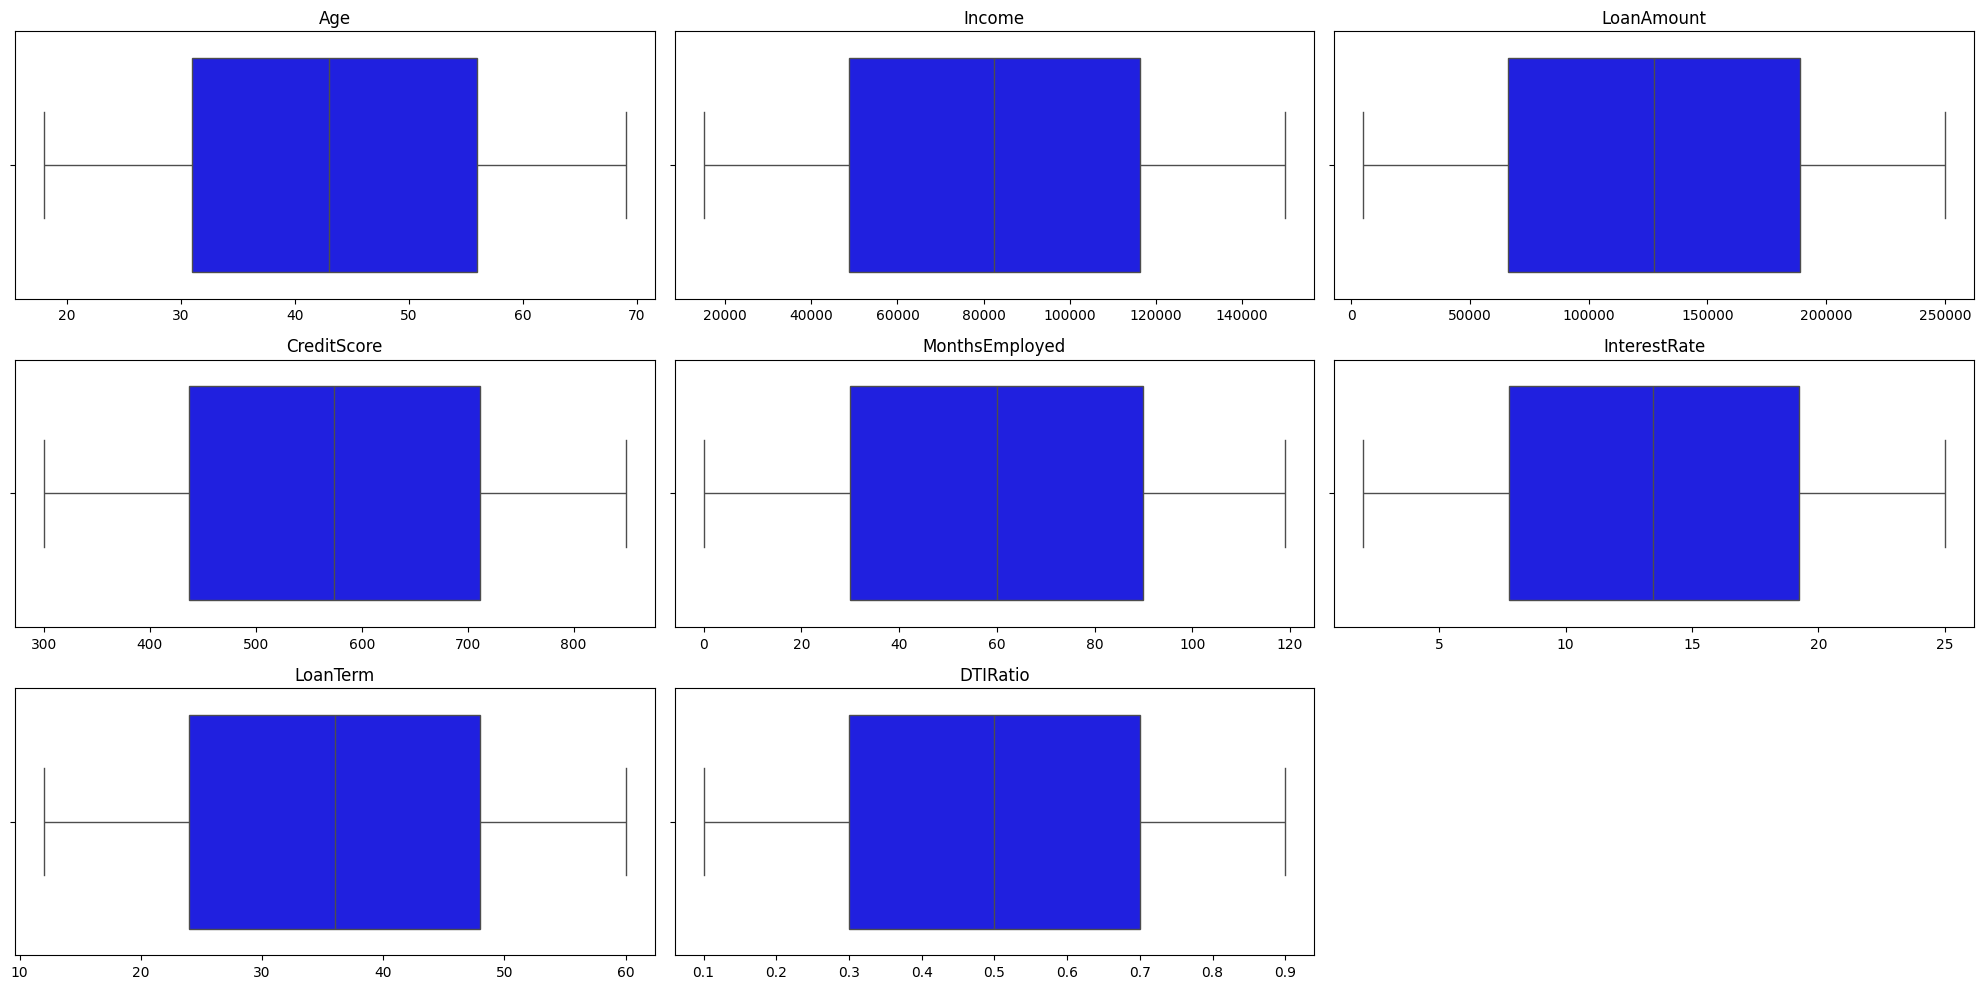

In [18]:
# Checking for Ouliers

plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=data[variable],color="blue")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

Observation :

* There is no such data skewness or outliers is seen in the numerical data.
* The dataset is free from outliers and skewness so it is ready to build a machine learning model.

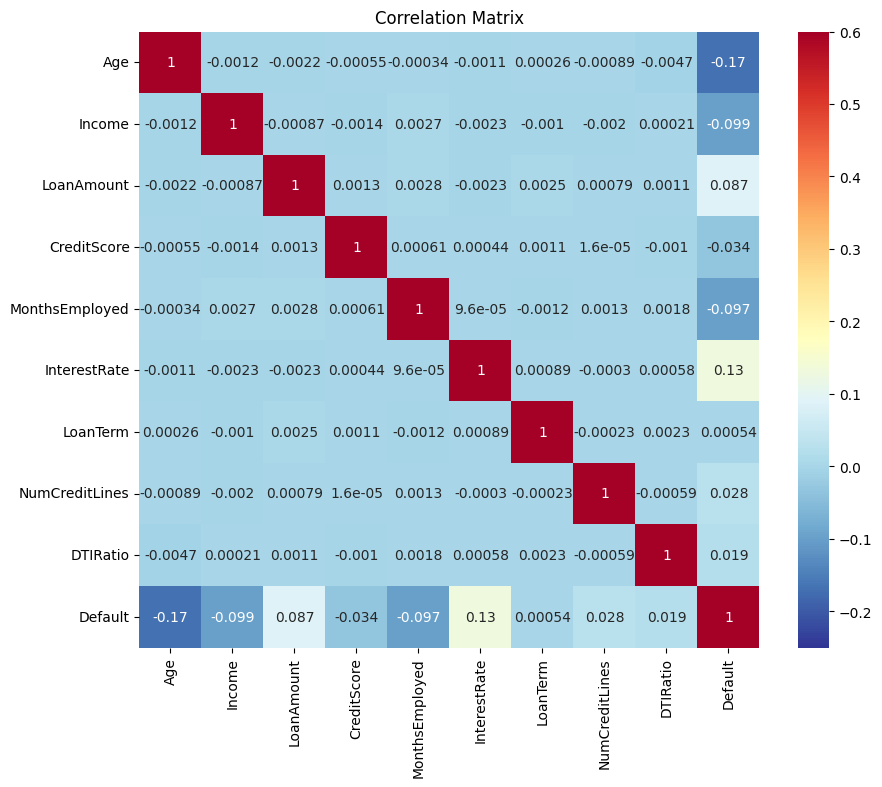

In [19]:
# Correlation Heatmap (Numerical Columns)

plt.figure(figsize=(10, 8))
sns.heatmap(data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm',
                'NumCreditLines' ,'DTIRatio',"Default"]].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

Inference :

* Default and Interest rate are positively correlated (0.13).
* Default and Age are negatively correlated (-0.17).
* "Credit Score" is negatively correlated with Loan default.

In [20]:
# Plots the distribution of a variable colored by value of the target
def kde_default(var_name, df):

    # Calculate the correlation coefficient between the new variable and the target
    corr = data['Default'].corr(data[var_name])

    # Calculate medians for repaid vs not repaid
    avg_repaid = data.loc[data['Default'] == 0, var_name].median()
    avg_not_repaid = data.loc[data['Default'] == 1, var_name].median()

    plt.figure(figsize=(12, 6))

    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(data.loc[df['Default'] == 0, var_name], label='Default == 0')
    sns.kdeplot(data.loc[df['Default'] == 1, var_name], label='Default == 1')

    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()

    # Print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))

    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid = %0.4f' % avg_repaid)

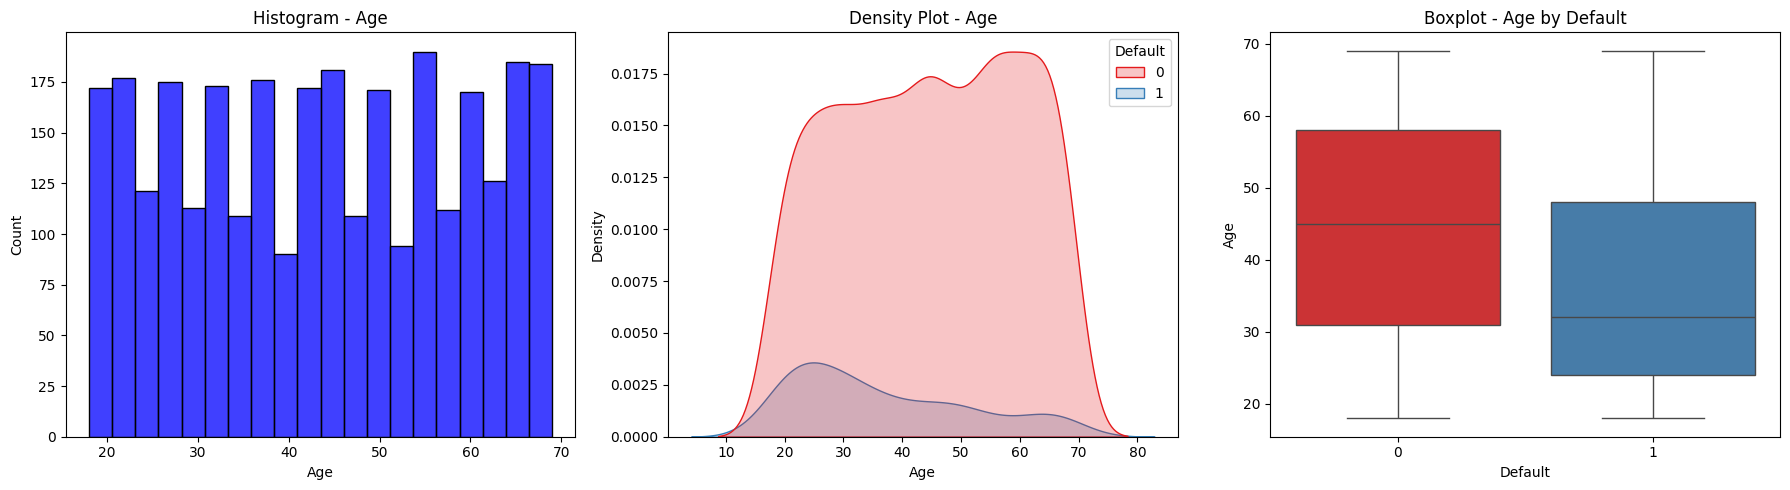

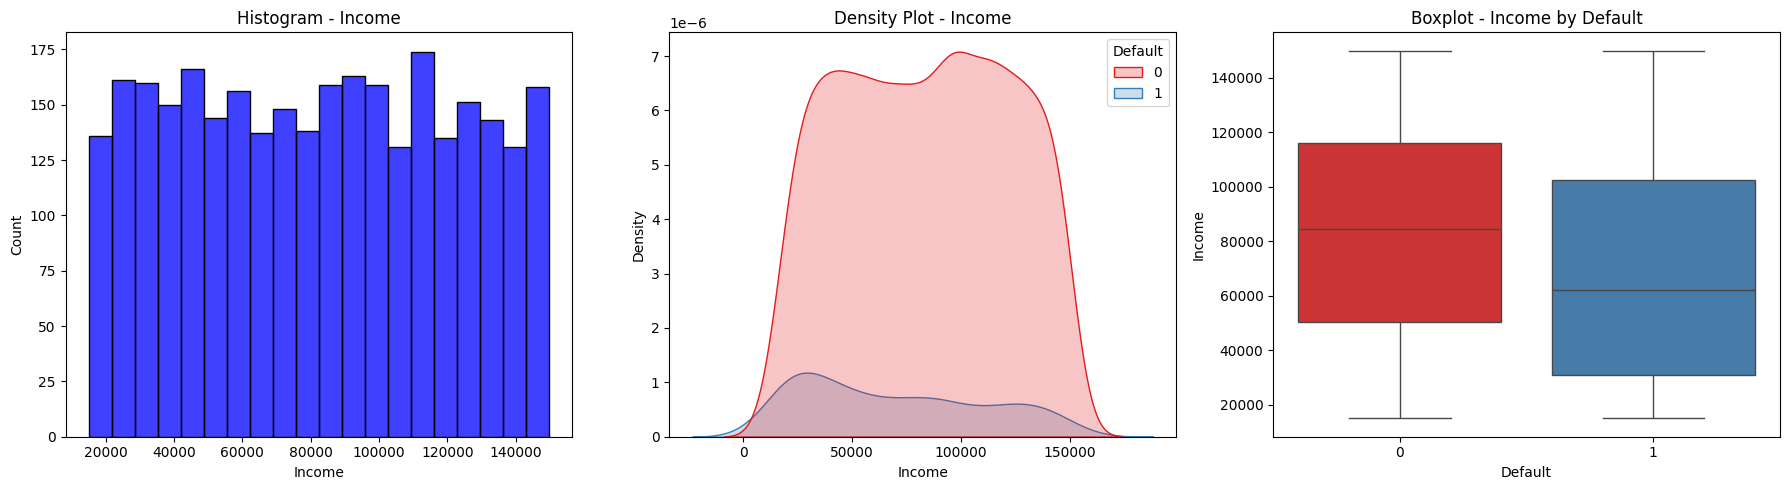

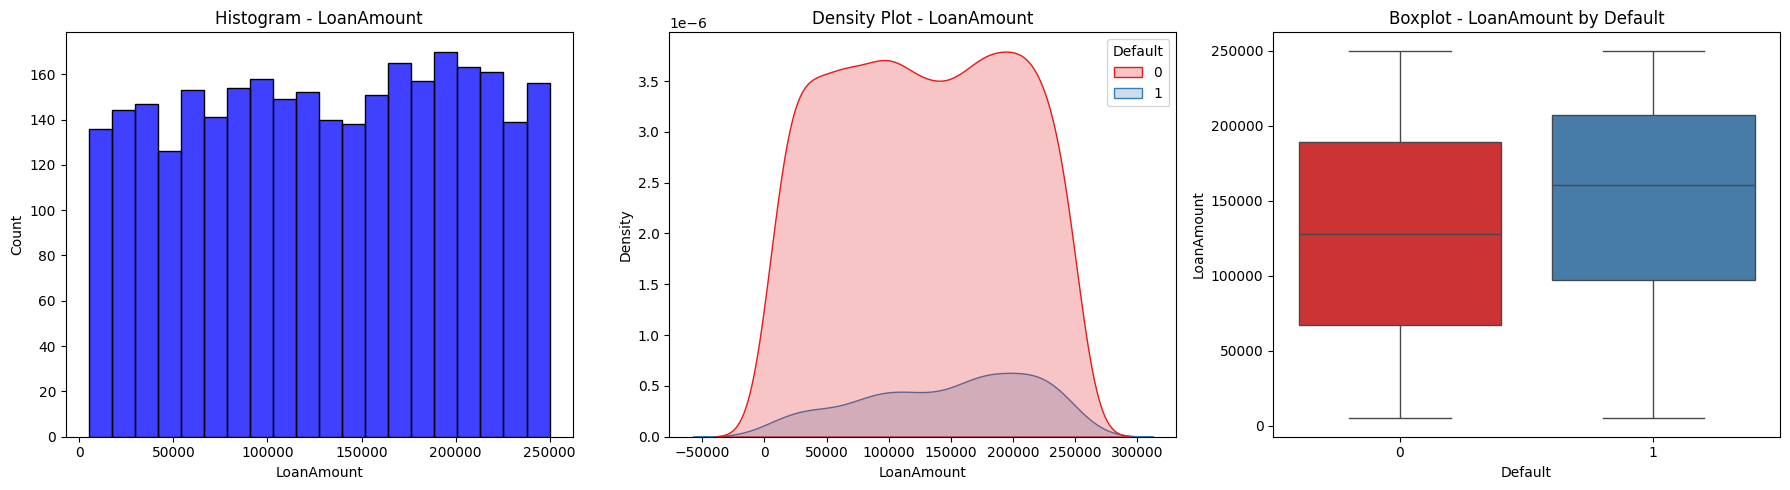

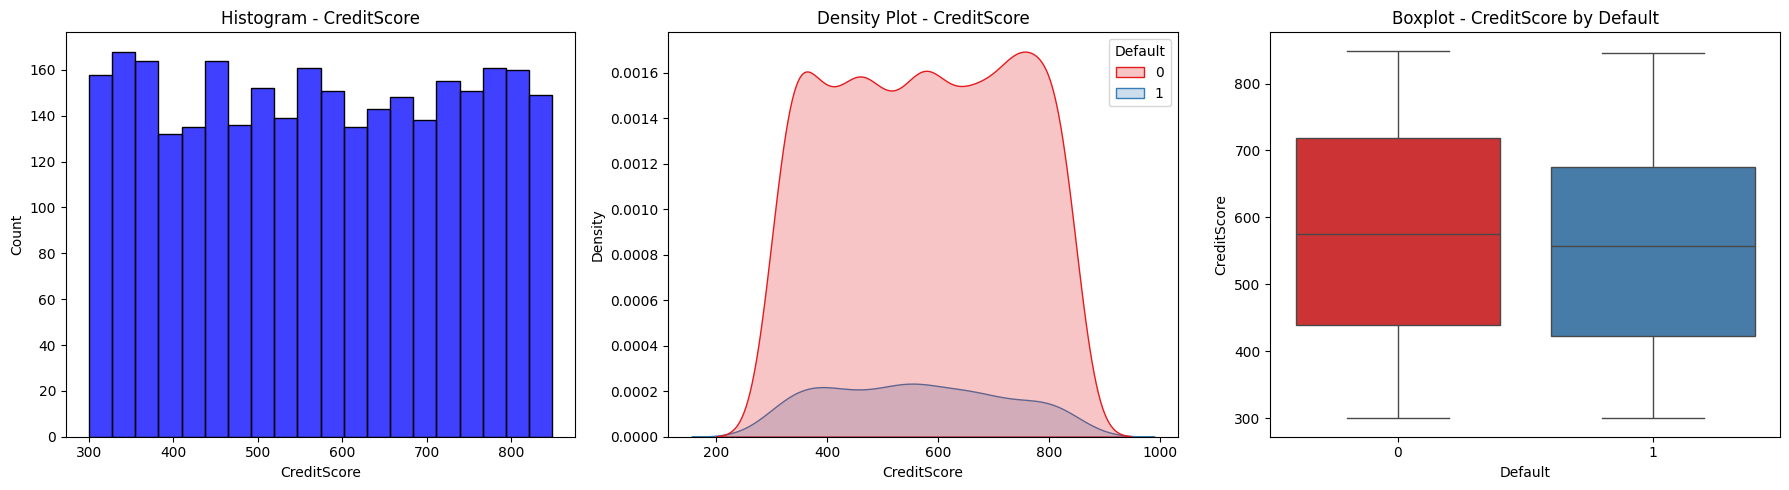

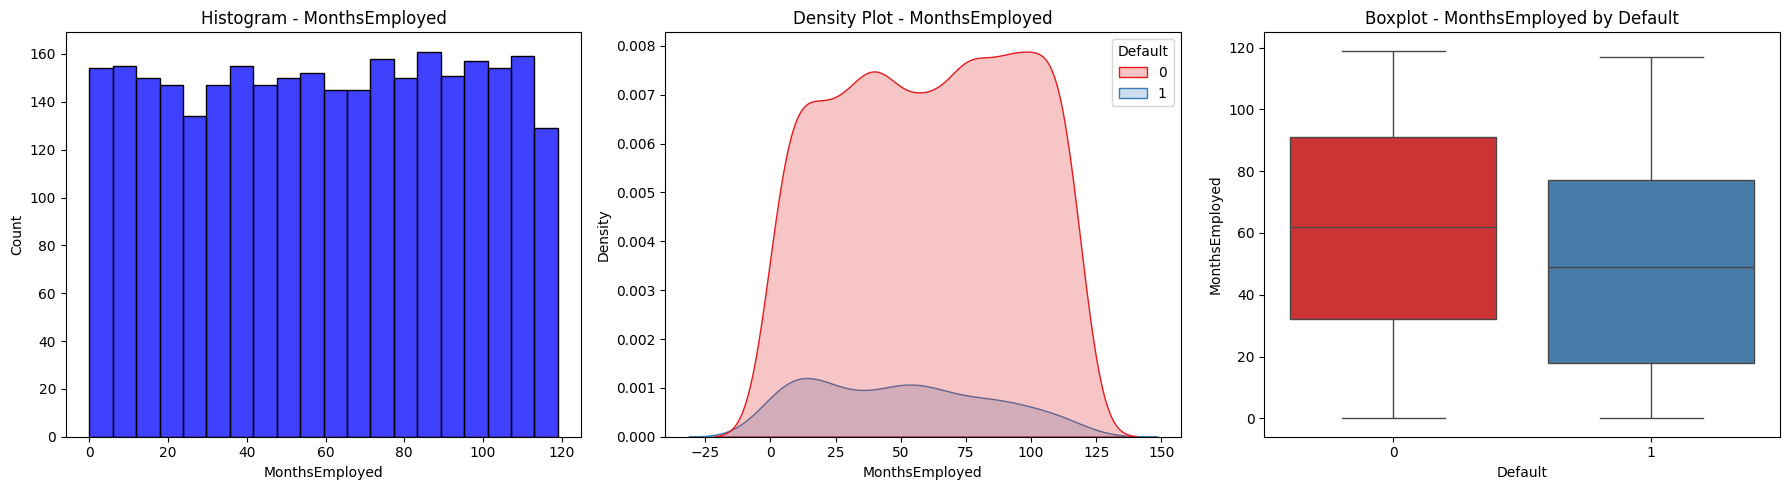

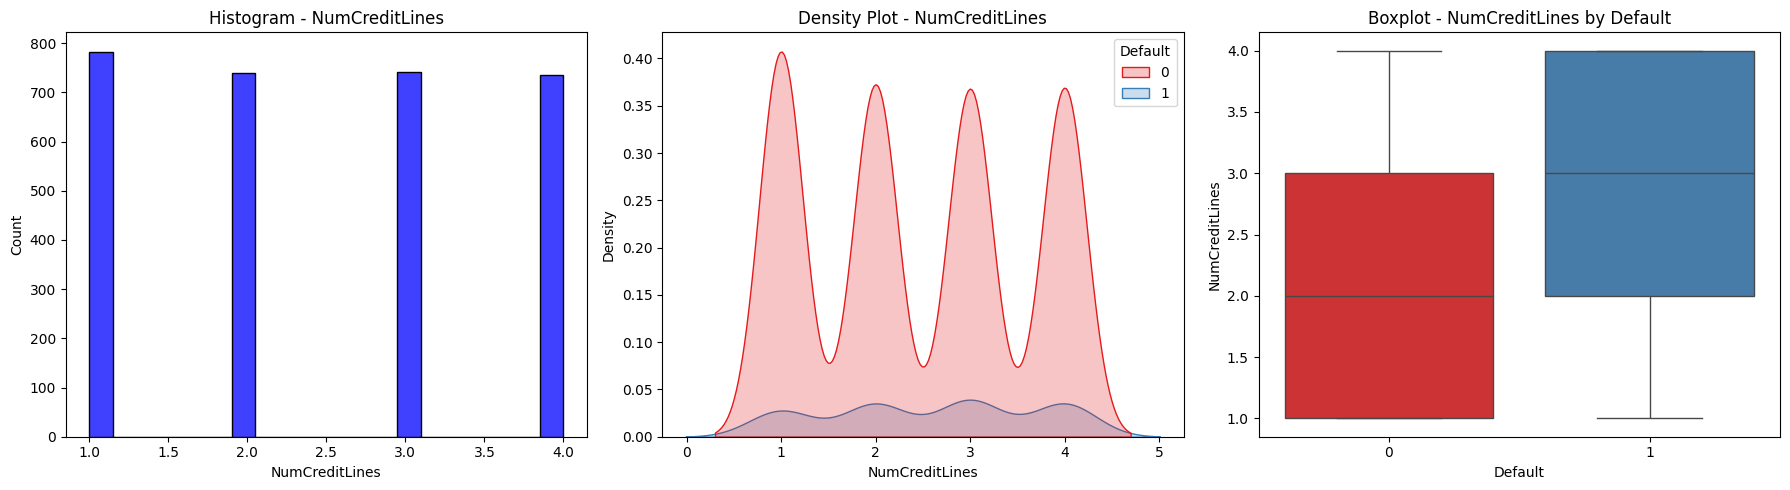

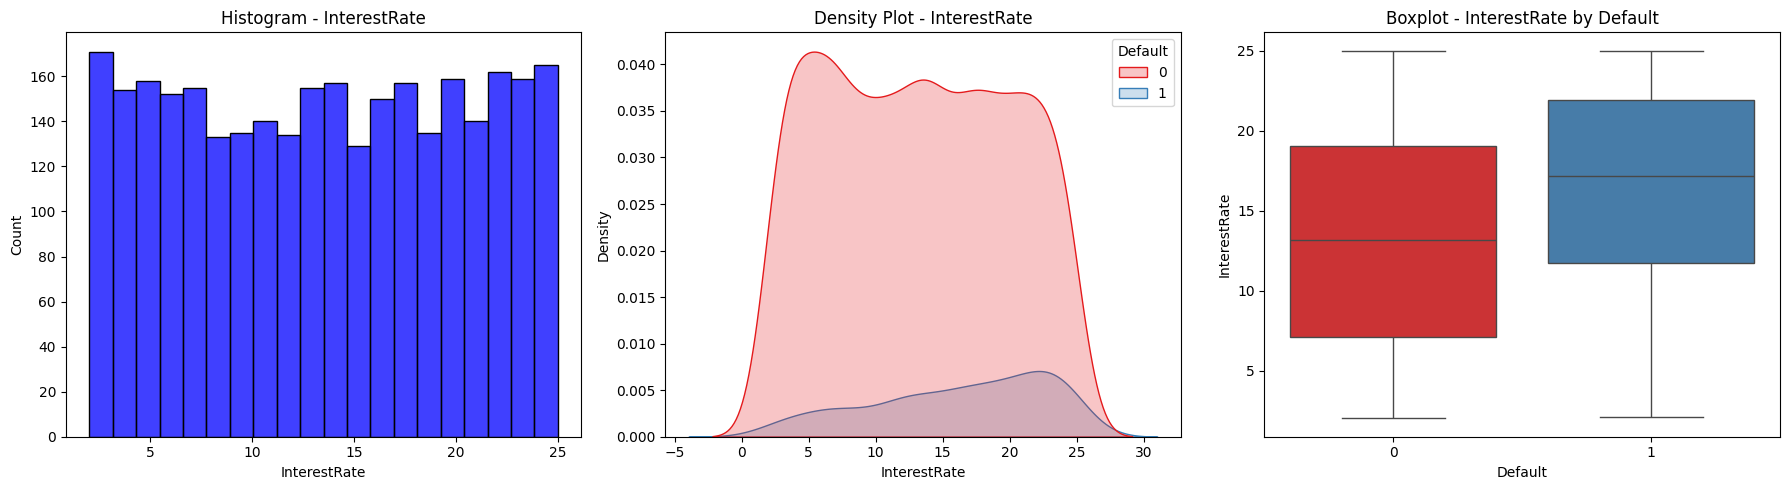

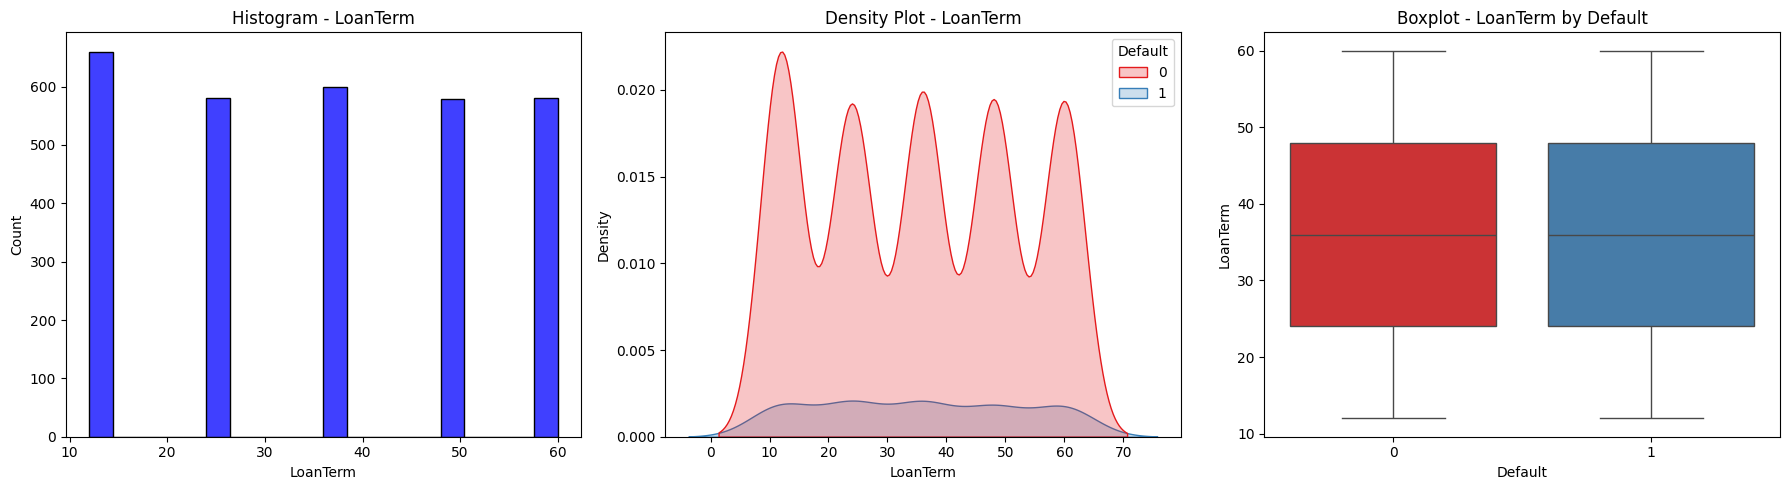

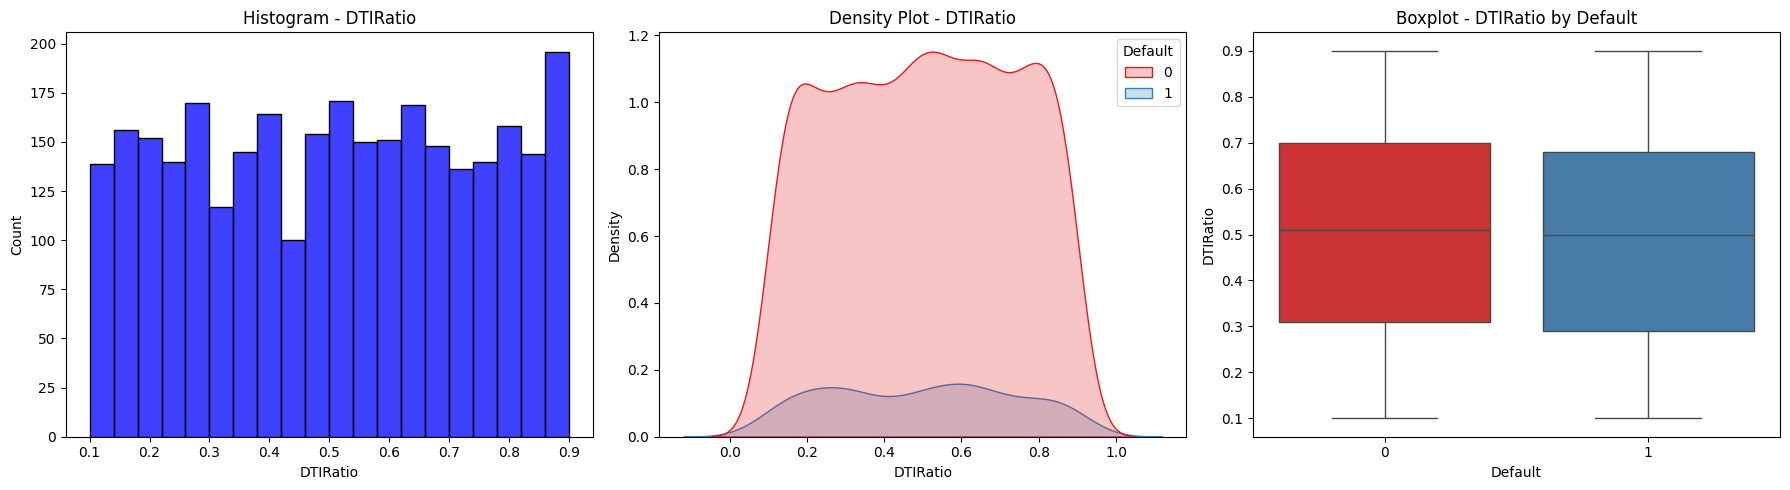

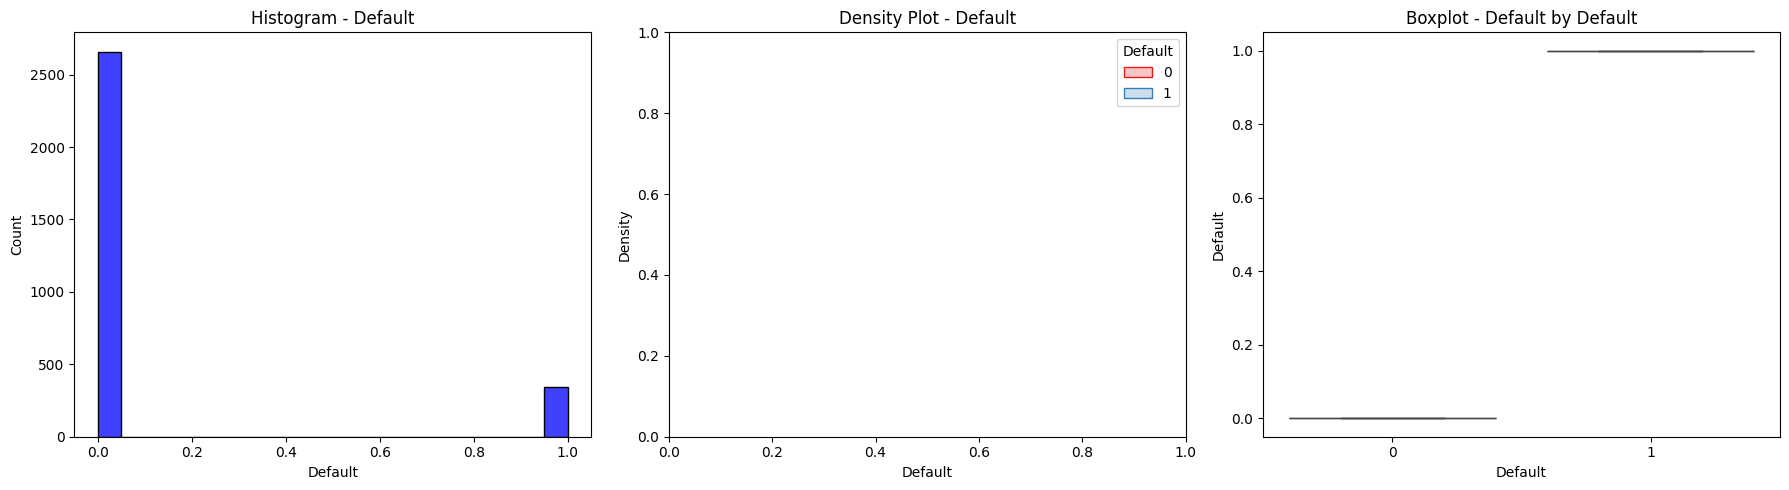

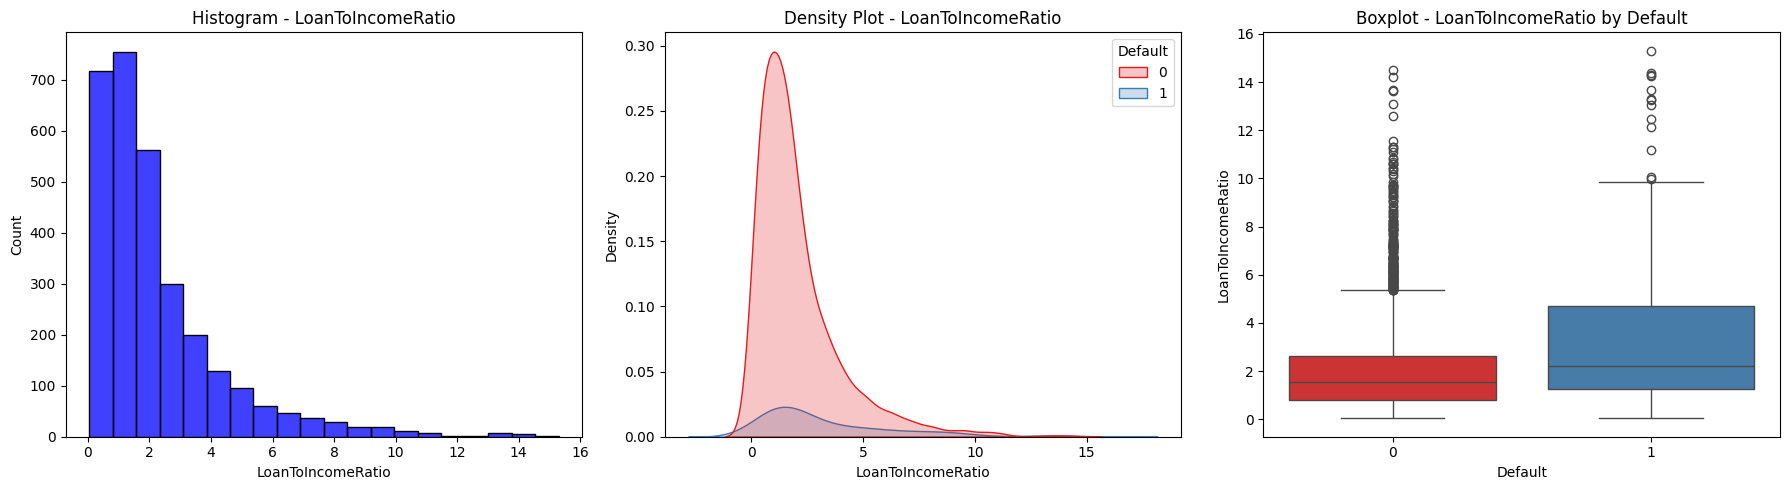

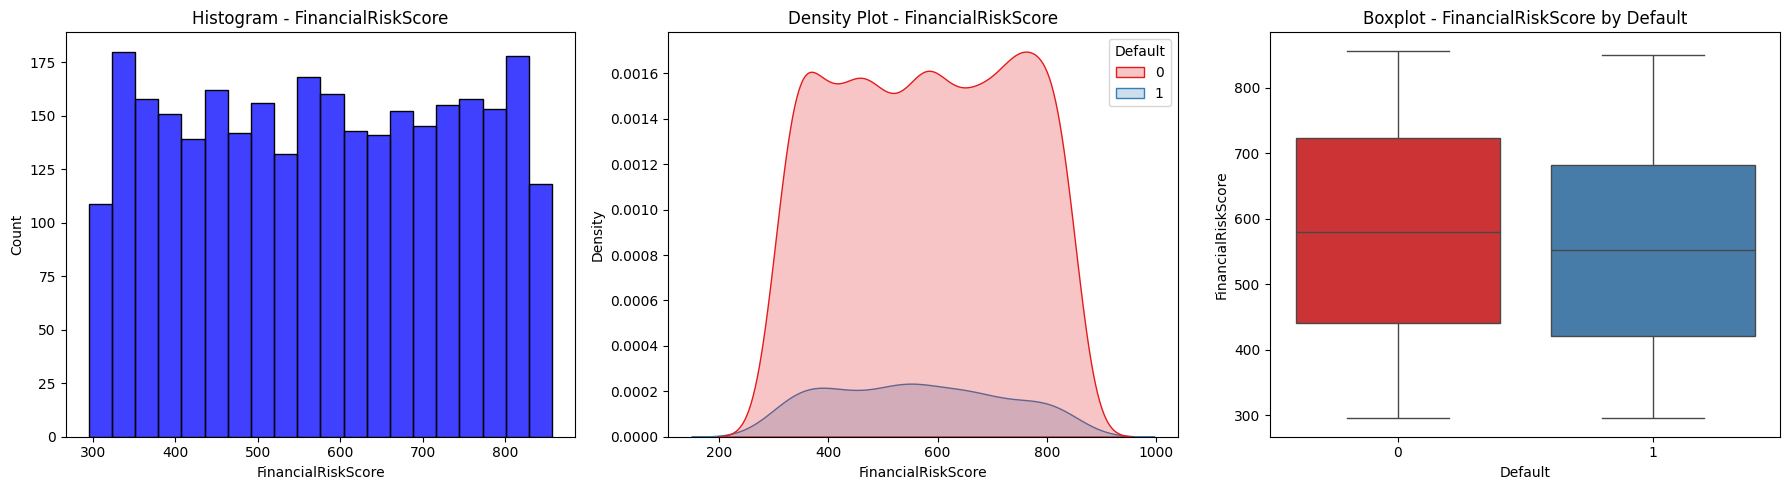

In [90]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Iterate through each numerical column
for numerical_variable in numerical_columns.columns:
    # Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Histogram without hue
    sns.histplot(data=data, x=numerical_variable, ax=ax1, bins=20, kde=False, color='blue')
    ax1.set_title(f'Histogram - {numerical_variable}')

    # Kernel density with hue='Default'
    sns.kdeplot(
        data=data,
        x=numerical_variable,
        hue='Default',
        ax=ax2,
        fill=True,
        palette='Set1'  # Automatically assigns colors for unique categories
    )
    ax2.set_title(f'Density Plot - {numerical_variable}')

    # Boxplot for each numerical variable grouped by 'Default'
    sns.boxplot(
        data=data,
        x='Default',
        y=numerical_variable,
        ax=ax3,
        palette='Set1'  # Automatically assigns colors for unique categories
    )
    ax3.set_title(f'Boxplot - {numerical_variable} by Default')

    # Adjust layout
    plt.tight_layout()
    plt.show()


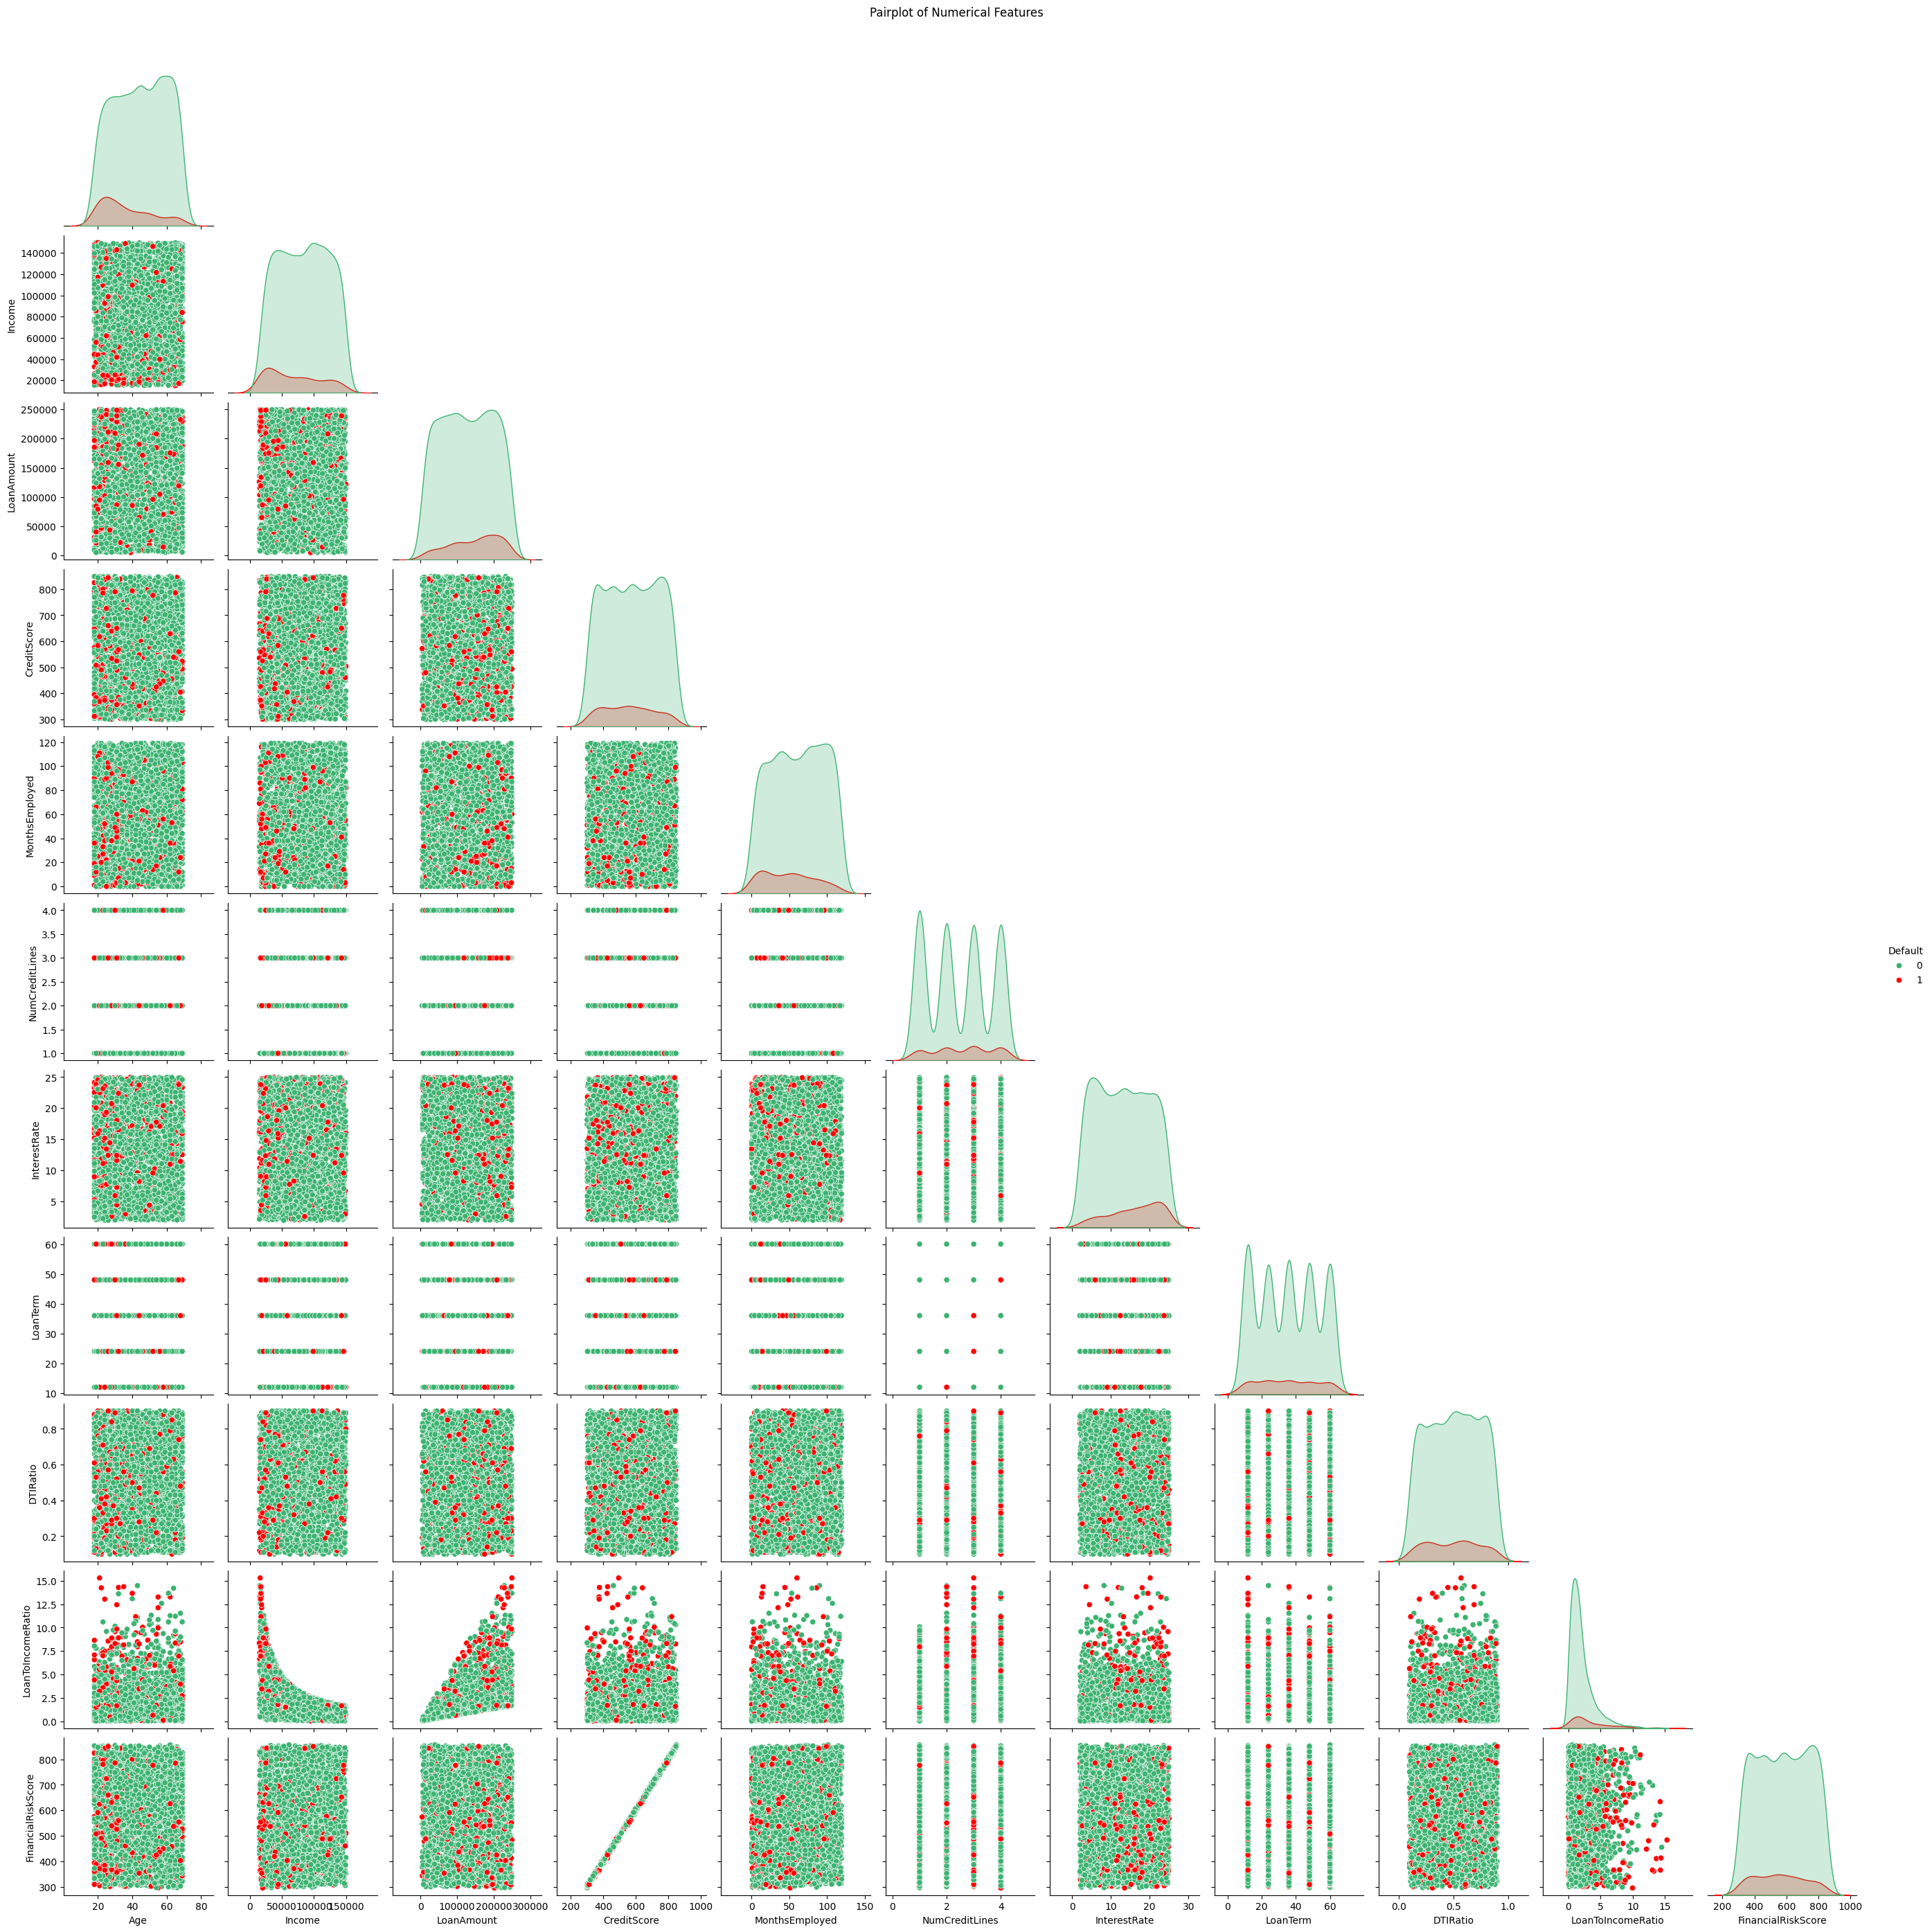

In [92]:
# Ensure 'Default' is categorical for the pairplot
data['Default'] = data['Default'].astype('category')

# Pairplot for numerical features with 'Default' as the hue
sns.pairplot(data, hue='Default', palette={1: 'red', 0: 'mediumseagreen'}, corner=True)
plt.suptitle('Pairplot of Numerical Features', y=1.02)  # Add a title
plt.show()

# Calculate the correlation matrix (Spearman correlation for non-linearity)
correlation_matrix = numerical_columns.corr(method='spearman')


The correlation between Age and the TARGET is -0.1678
Median value for loan that was not repaid = 34.0000
Median value for loan that was repaid = 45.0000


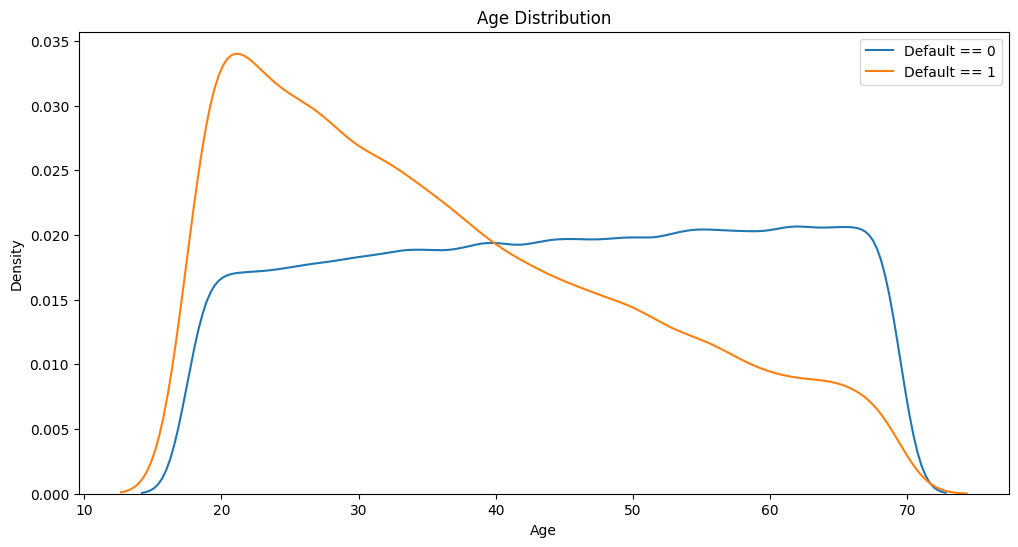

In [21]:
# kernel density estimation plot for Age

kde_default('Age', data)

The correlation between InterestRate and the TARGET is 0.1313
Median value for loan that was not repaid = 16.9300
Median value for loan that was repaid = 12.9900


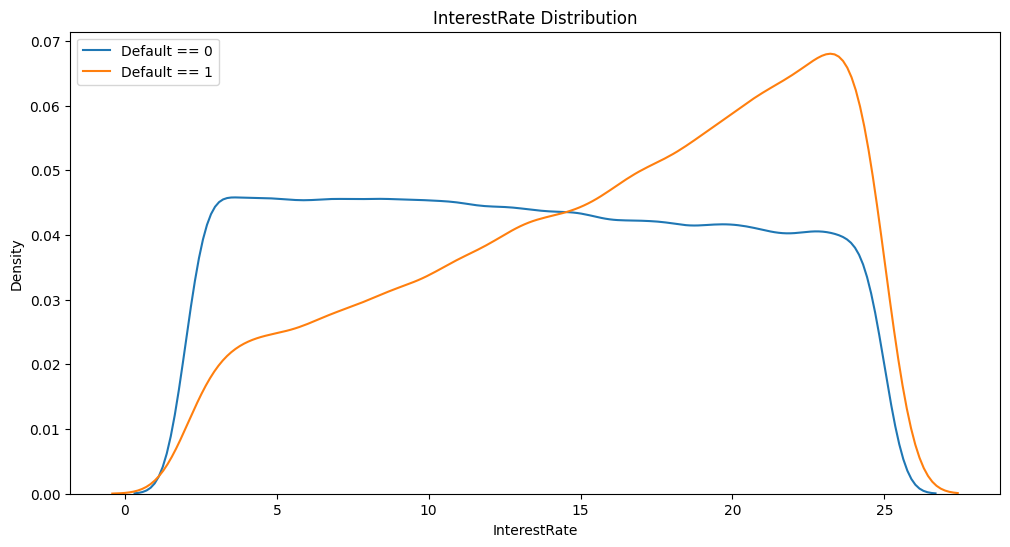

In [22]:
# kernel density estimation plot for Interest Rates

kde_default('InterestRate', data)

The correlation between Income and the TARGET is -0.0991
Median value for loan that was not repaid = 66566.0000
Median value for loan that was repaid = 84237.5000


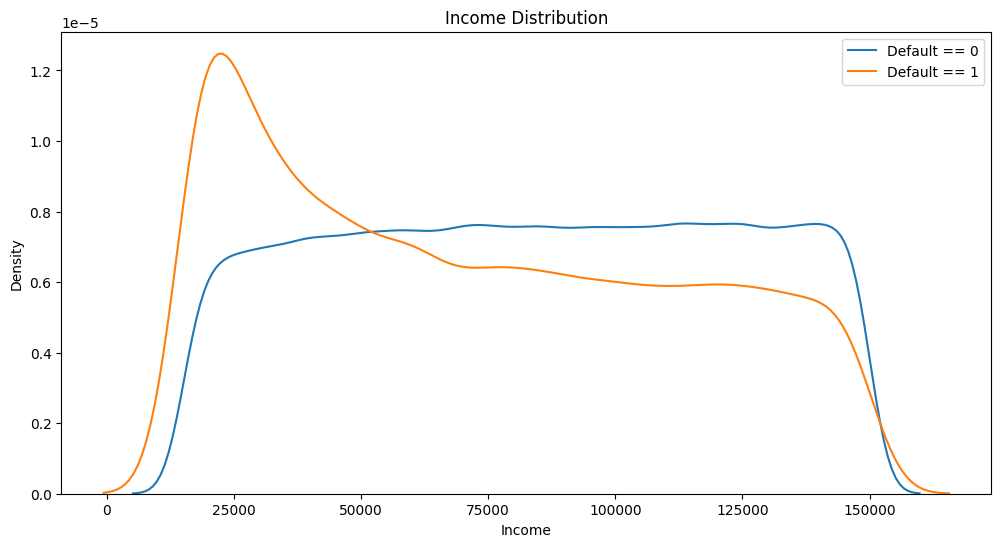

In [23]:
# kernel density estimation plot for Income

kde_default('Income', data)

In [24]:
# Feature Engineering

data['LoanToIncomeRatio'] = data['LoanAmount']/data['Income']
data['FinancialRiskScore'] = data['CreditScore'] - data['LoanToIncomeRatio'] + (data['MonthsEmployed']/12)

The correlation between LoanToIncomeRatio and the TARGET is 0.1790
Median value for loan that was not repaid = 2.0499
Median value for loan that was repaid = 1.4956


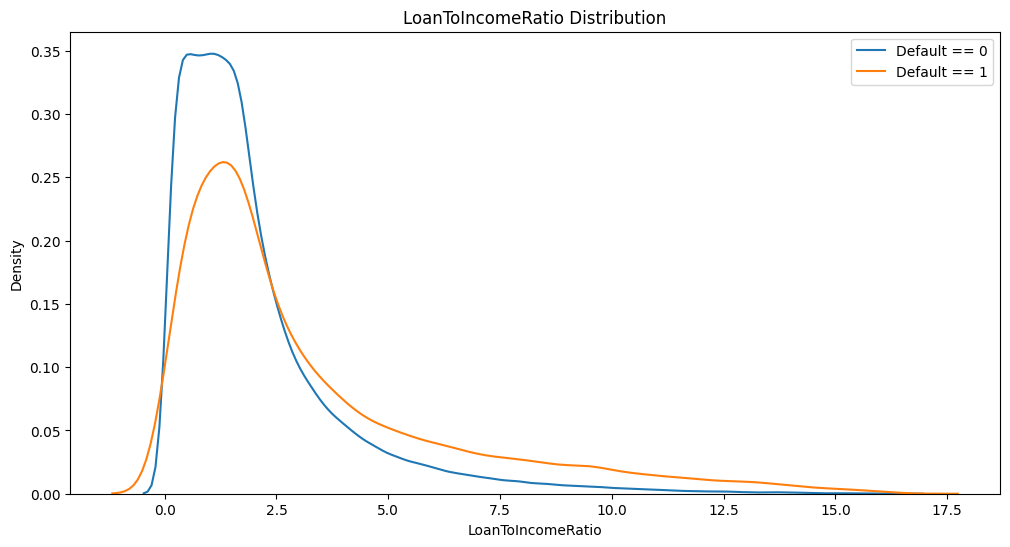

In [25]:
# kernel density estimation plot for Loan to Income Ratio

kde_default('LoanToIncomeRatio',data)

The correlation between FinancialRiskScore and the TARGET is -0.0384
Median value for loan that was not repaid = 553.8528
Median value for loan that was repaid = 579.5443


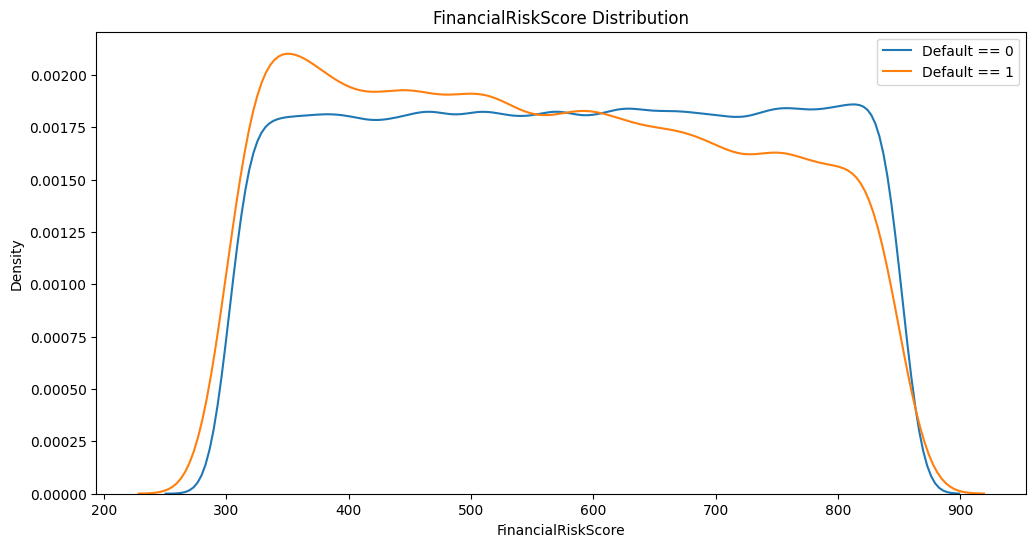

In [26]:
# kernel density estimation plot for Financial Risk Score

kde_default('FinancialRiskScore',data)

# 5. Machine Learning Model Evaluations and Predictions

We explore the following models:

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. k-Nearest Neighbor
5. Naive Base
6. XGboost

## 5.1 Feature Selection

In [27]:
# It is a rather large dataset; +24MB will subset data to n=3000 samples for uploading

data = data.sample(n=3000, random_state=42).copy()

In [28]:
# Step 1: Data Preprocessing and Feature Selection

# Separate features (X) and target variable (y)
X = data.drop(['Default', 'LoanID'], axis=1)
y = data['Default']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Step 2: Feature Selection using Random Forest

# Train RandomForestClassifier to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Select features with importance > 0.03
selected_features = importance_df[importance_df['Importance'] > 0.03]['Feature']

# Filter selected features in train and test datasets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

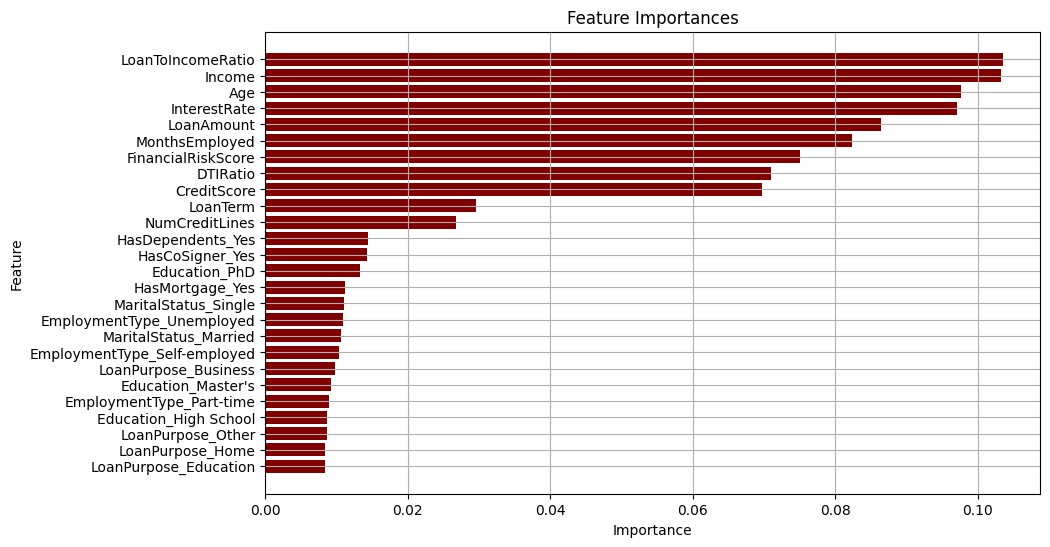

In [30]:
# Plot feature importances

# Sort importance_df by Importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

## 5.2 Applying Synthetic Minority Over-Sampling Technique SMOTE

In [31]:
# Print the shapes of the resulting datasets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print the distribution of target classes in train and test sets
print("\nDistribution of classes in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))

X_train_selected shape: (2400, 9)
X_test_selected shape: (600, 9)
y_train shape: (2400,)
y_test shape: (600,)

Distribution of classes in y_train:
Default
0    0.89375
1    0.10625
Name: proportion, dtype: float64

Distribution of classes in y_test:
Default
0    0.856667
1    0.143333
Name: proportion, dtype: float64


The classes are heavily unbalanced and will heavily skew the results. This MUST be addressed in order to accurately predict our target 'Default' variable. Applying Synthetic Minority Over-Sampling Technique SMOTE

In [32]:
# Apply SMOTE to balance the classes on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

In [33]:
# Print shapes after SMOTE
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (4290, 9)
y_train_resampled shape: (4290,)
X_test_selected shape: (600, 9)
y_test shape: (600,)


Now both classes are of equal proportion

In [34]:
print("\nDistribution of classes in y_train resampled:")
print(y_train_resampled.value_counts(normalize=True))


Distribution of classes in y_train resampled:
Default
0    0.5
1    0.5
Name: proportion, dtype: float64


## 5.3 Classification Algorithms

### 5.3.1. Decision Tree Classifier

Decision Tree - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2145
           1       0.91      1.00      0.95       255

    accuracy                           0.99      2400
   macro avg       0.95      0.99      0.97      2400
weighted avg       0.99      0.99      0.99      2400

Decision Tree - Confusion Matrix (Training Set):
[[2119   26]
 [   0  255]]



Decision Tree - Test Set Performance:
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       514
           1       0.26      0.42      0.32        86

    accuracy                           0.75       600
   macro avg       0.58      0.61      0.58       600
weighted avg       0.80      0.75      0.77       600



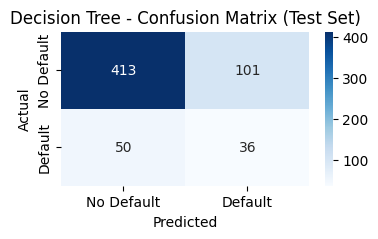

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)



# Make predictions on training data
y_pred_train = best_dt_classifier.predict(X_train_selected)

# Performance metrics on training data
print("Decision Tree - Training Set Performance:")
print(classification_report(y_train, y_pred_train))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Decision Tree - Confusion Matrix (Training Set):")
print(conf_matrix_train)


# Performance metrics on test data
print("\n\n\nDecision Tree - Test Set Performance:")
print(classification_report(y_test, y_pred_dt))
conf_matrix_test_DS = confusion_matrix(y_test, y_pred_dt)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_DS, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Decision Tree - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

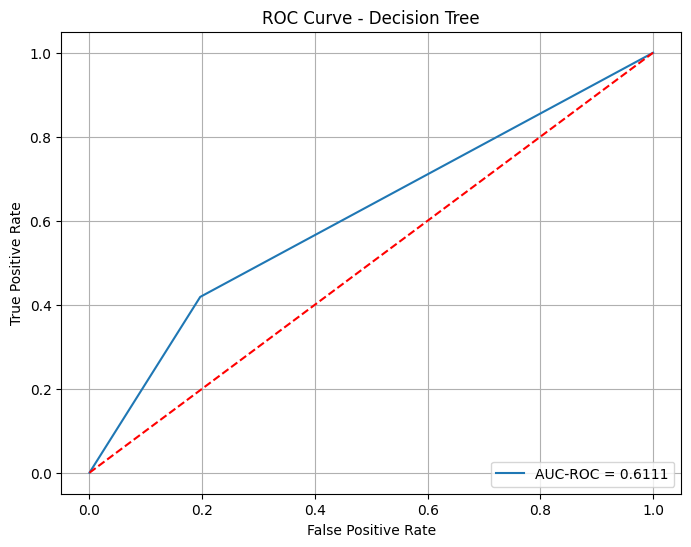

Decision Tree Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.7483333333333333
Test Precision: 0.26277372262773724
Test Recall: 0.4186046511627907
Test ROC AUC: 0.6110532983440413


In [84]:
# Plot the ROC Curve for Decision Tree
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_dt:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print evaluation metrics for Decision Tree classifier
print("Decision Tree Classifier:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Test Accuracy:", accuracy_dt)
print("Test Precision:", precision_dt)
print("Test Recall:", recall_dt)
print("Test ROC AUC:", roc_auc_dt)

### 5.3.2. Random Forest Classifier

Random Forest - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2145
           1       1.00      1.00      1.00      2145

    accuracy                           1.00      4290
   macro avg       1.00      1.00      1.00      4290
weighted avg       1.00      1.00      1.00      4290

Random Forest - Confusion Matrix (Training Set):
[[2145    0]
 [   0 2145]]



Random Forest (with Best Hyperparameters) - Test Set Performance:
Accuracy: 0.7866666666666666
Precision: 0.26666666666666666
Recall: 0.27906976744186046
ROC AUC: 0.5753325490905801
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       514
           1       0.27      0.28      0.27        86

    accuracy                           0.79       600
   macro avg       0.57      0.58      0.57       600
weighted avg       0.79      0.79      0.79       600



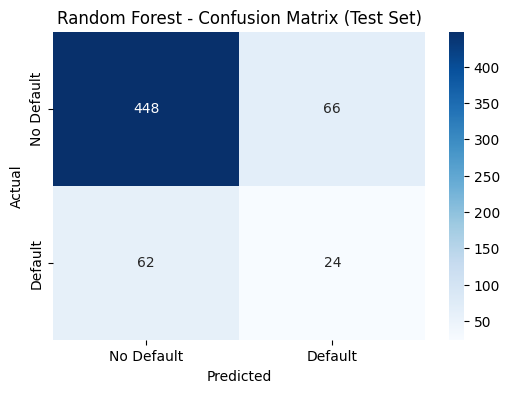

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Make predictions on training data
y_pred_train = best_rf_classifier.predict(X_train_resampled)

# Performance metrics on training data
print("Random Forest - Training Set Performance:")
print(classification_report(y_train_resampled, y_pred_train))
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("Random Forest - Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Performance metrics on test data
print("\n\n\nRandom Forest (with Best Hyperparameters) - Test Set Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("ROC AUC:", roc_auc_rf)
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for test data
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


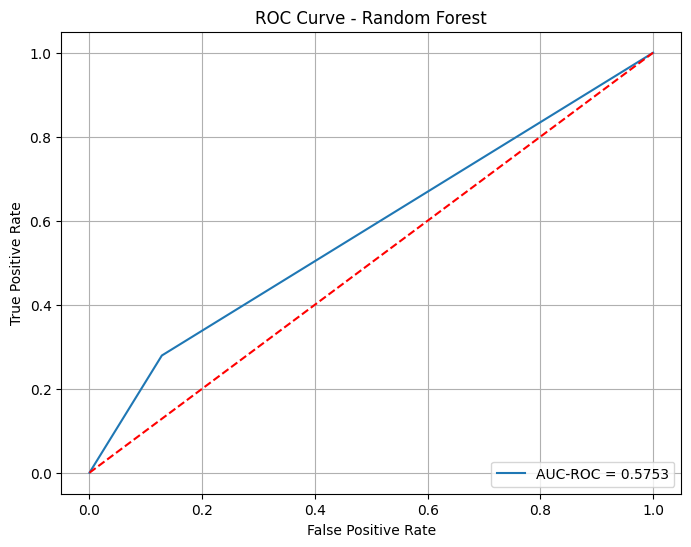

Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.7866666666666666
Test Precision: 0.26666666666666666
Test Recall: 0.27906976744186046
Test ROC AUC: 0.5753325490905801


In [63]:
# Plot the ROC Curve for RF
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_rf:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




# Print evaluation metrics for Random Forest classifier
print("Random Forest Classifier:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Test Accuracy:", accuracy_rf)
print("Test Precision:", precision_rf)
print("Test Recall:", recall_rf)
print("Test ROC AUC:", roc_auc_rf)

### 5.3.3. Logistic Regression Classifier

Logistic Regression Classifier - Training Set Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2145
           1       0.72      0.08      0.15       255

    accuracy                           0.90      2400
   macro avg       0.81      0.54      0.55      2400
weighted avg       0.88      0.90      0.86      2400

Logistic Regression Classifier - Confusion Matrix (Training Set):
[[2137    8]
 [ 234   21]]
Logistic Regression Classifier - Test Set Performance:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       514
           1       0.70      0.08      0.15        86

    accuracy                           0.86       600
   macro avg       0.78      0.54      0.54       600
weighted avg       0.84      0.86      0.81       600

Logistic Regression Classifier - Confusion Matrix (Training Set):
[[511   3]
 [ 79   7]]


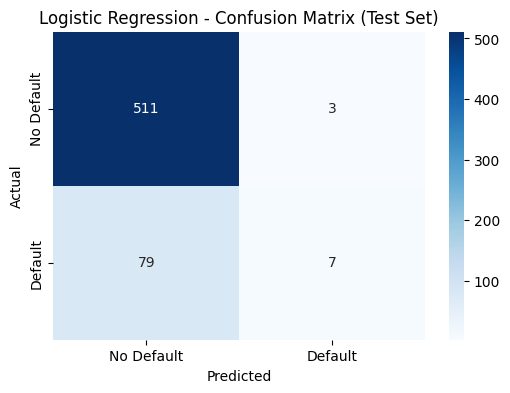

In [78]:
# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Make predictions on training data
y_pred_train = best_log_reg.predict(X_train_scaled)

# Performance metrics on training data
print("Logistic Regression Classifier - Training Set Performance:")
print(classification_report(y_train, y_pred_train))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Logistic Regression Classifier - Confusion Matrix (Training Set):")
print(conf_matrix_train)


 #Performance metrics on training data
print("Logistic Regression Classifier - Test Set Performance:")
print(classification_report(y_test, y_pred_logreg))
conf_matrix_train = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Classifier - Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Generate and visualize the confusion matrix for test data
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Logistic Regression - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


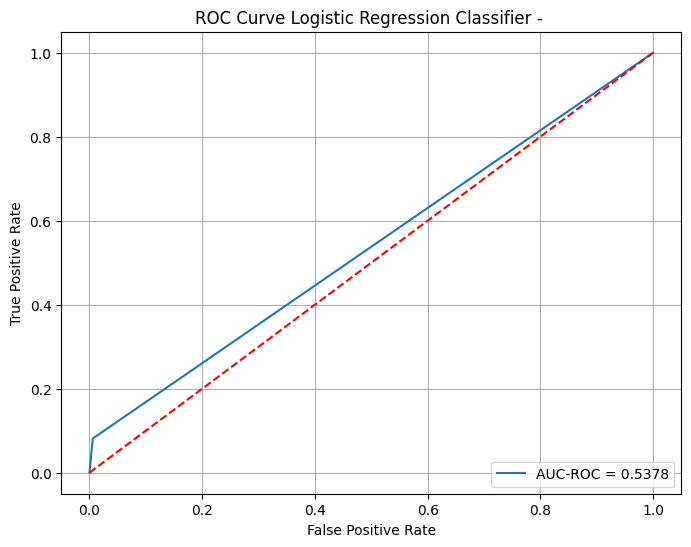

Best Logistic Regression Model:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy: 0.8633333333333333
Test Precision: 0.7
Test Recall: 0.08139534883720931
Test ROC AUC: 0.5377793864808614
Confusion Matrix:
 [[511   3]
 [ 79   7]]


In [80]:

# Plot the ROC Curve for Logistic Regression Classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_logreg:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve Logistic Regression Classifier - ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Print evaluation metrics including the confusion matrix
print("Best Logistic Regression Model:")
print("Best Parameters:", grid_search_logreg.best_params_)
print("Test Accuracy:", accuracy_logreg)
print("Test Precision:", precision_logreg)
print("Test Recall:", recall_logreg)
print("Test ROC AUC:", roc_auc_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)


### 5.3.4. k-Nearest Neighbors (k-NN) Classifier

K-Nearest Neighbors Classifier - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2145
           1       1.00      1.00      1.00      2145

    accuracy                           1.00      4290
   macro avg       1.00      1.00      1.00      4290
weighted avg       1.00      1.00      1.00      4290

K-Nearest Neighbors Classifier - Confusion Matrix (Training Set):
[[2145    0]
 [   0 2145]]



K-Nearest Neighbors (with Best 'k') - Test Set Performance:
Accuracy: 0.6816666666666666
Precision: 0.18181818181818182
Recall: 0.3488372093023256
ROC AUC: 0.5430956474527192
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       514
           1       0.18      0.35      0.24        86

    accuracy                           0.68       600
   macro avg       0.53      0.54      0.52       600
weighted avg       0.77      0.68      0.72       600



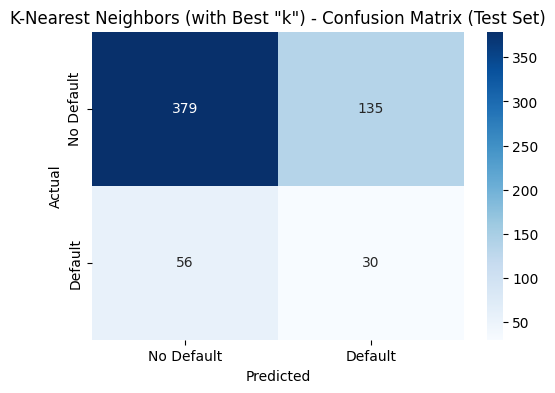

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Define the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best k-NN classifier with optimal parameters
best_knn_classifier = grid_search_knn.best_estimator_

# Make predictions on training data
y_pred_train = best_knn_classifier.predict(X_train_resampled)

# Performance metrics on training data
print("K-Nearest Neighbors Classifier - Training Set Performance:")
print(classification_report(y_train_resampled, y_pred_train))
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("K-Nearest Neighbors Classifier - Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predict on the test set and evaluate performance
y_pred_knn = best_knn_classifier.predict(X_test_selected)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Performance metrics on test data
print("\n\n\nK-Nearest Neighbors (with Best 'k') - Test Set Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("ROC AUC:", roc_auc_knn)
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for test data
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('K-Nearest Neighbors (with Best "k") - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


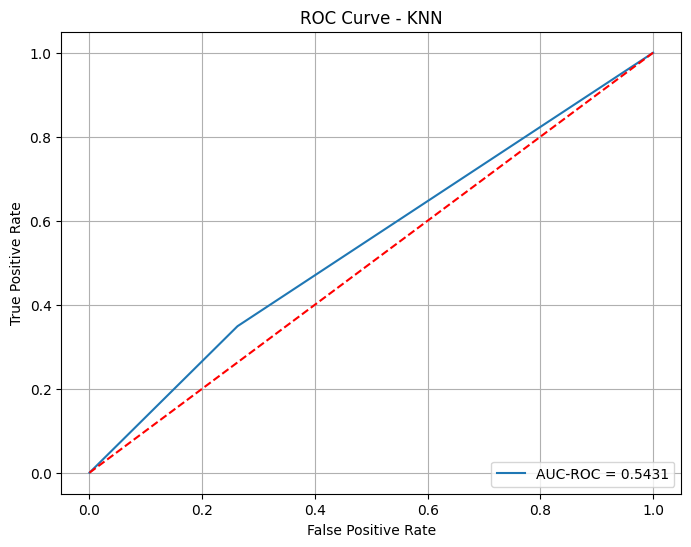

k-Nearest Neighbors (k-NN) Classifier:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.6816666666666666
Test Precision: 0.18181818181818182
Test Recall: 0.3488372093023256
Test ROC AUC: 0.5430956474527192


In [62]:
# Plot the ROC Curve for  k-Nearest Neighbors (k-NN) Classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_knn:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Print evaluation metrics for k-NN classifier
print("k-Nearest Neighbors (k-NN) Classifier:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Test Accuracy:", accuracy_knn)
print("Test Precision:", precision_knn)
print("Test Recall:", recall_knn)
print("Test ROC AUC:", roc_auc_knn)


### 5.3.5. Naive Bayes Classifier (GaussianNB)

Naive Bayes Classifier - Training Set Performance:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2145
           1       0.75      0.72      0.73      2145

    accuracy                           0.74      4290
   macro avg       0.74      0.74      0.74      4290
weighted avg       0.74      0.74      0.74      4290

Naive Bayes Classifier - Confusion Matrix (Training Set):
[[1614  531]
 [ 592 1553]]


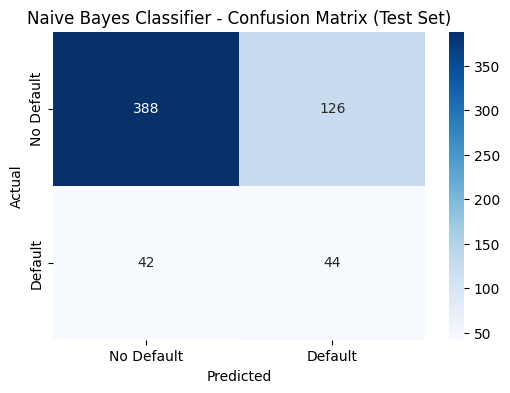

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on training data
y_pred_train = nb_classifier.predict(X_train_resampled)

# Performance metrics on training data
print("Naive Bayes Classifier - Training Set Performance:")
print(classification_report(y_train_resampled, y_pred_train))
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("Naive Bayes Classifier - Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test_selected)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)


# Confusion matrix for test data
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_nb)

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Naive Bayes Classifier - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


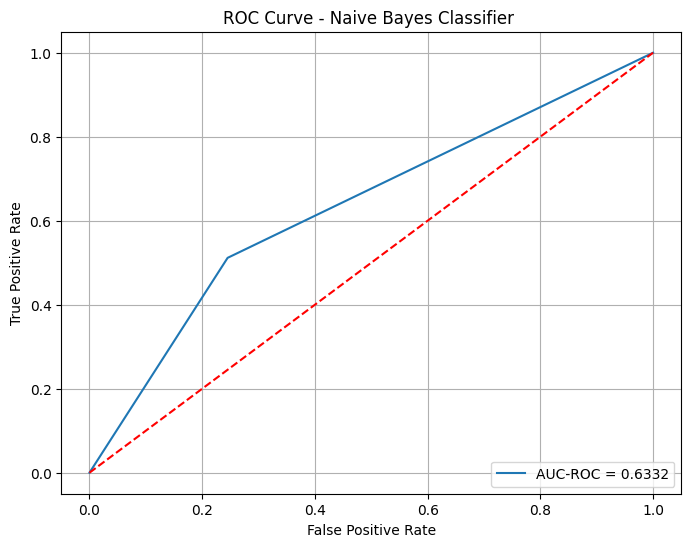

Naive Bayes Classifier:
Test Accuracy: 0.72
Test Precision: 0.25882352941176473
Test Recall: 0.5116279069767442
Test ROC AUC: 0.6332458601031581


In [81]:
# Plot the ROC Curve for Naive Bayes Classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_nb:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve - Naive Bayes Classifier ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print evaluation metrics for Naive Bayes classifier
print("Naive Bayes Classifier:")
print("Test Accuracy:", accuracy_nb)
print("Test Precision:", precision_nb)
print("Test Recall:", recall_nb)
print("Test ROC AUC:", roc_auc_nb)

### 5.3.6. XGBoost Classifier

XGBoost Classifier - Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2145
           1       0.96      1.00      0.97      2145

    accuracy                           0.97      4290
   macro avg       0.98      0.97      0.97      4290
weighted avg       0.98      0.97      0.97      4290

XGBoost Classifier - Confusion Matrix (Training Set):
[[2045  100]
 [  10 2135]]



Gradient Boosting (with Best Hyperparameters) - Test Set Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       514
           1       0.23      0.28      0.25        86

    accuracy                           0.76       600
   macro avg       0.55      0.56      0.55       600
weighted avg       0.78      0.76      0.77       600



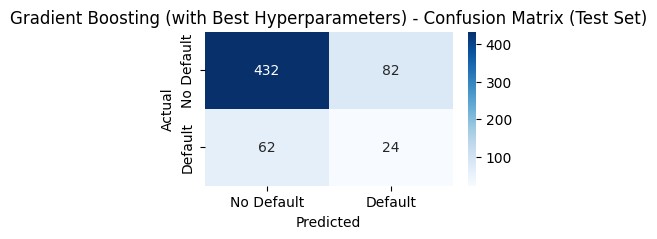

ROC AUC: 0.5598


In [66]:
# Ensure all necessary libraries are imported
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'colsample_bytree': [0.5, 0.7]
}

# Perform GridSearchCV to find the best parameters
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best XGBoost classifier with optimal parameters
best_xgb_classifier = grid_search_xgb.best_estimator_

# Make predictions on training data (use the same resampled data)
y_pred_train = best_xgb_classifier.predict(X_train_resampled)

# Performance metrics on training data
print("XGBoost Classifier - Training Set Performance:")
print(classification_report(y_train_resampled, y_pred_train))
conf_matrix_train = confusion_matrix(y_train_resampled, y_pred_train)
print("XGBoost Classifier - Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predict on the test set and evaluate performance
y_pred_xgb = best_xgb_classifier.predict(X_test_selected)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Performance metrics on test data
print("\n\n\nGradient Boosting (with Best Hyperparameters) - Test Set Performance:")
print(classification_report(y_test, y_pred_xgb))
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_xgb)

# Confusion matrix for test data
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting (with Best Hyperparameters) - Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print ROC AUC score for test set
print(f"ROC AUC: {roc_auc_xgb:.4f}")


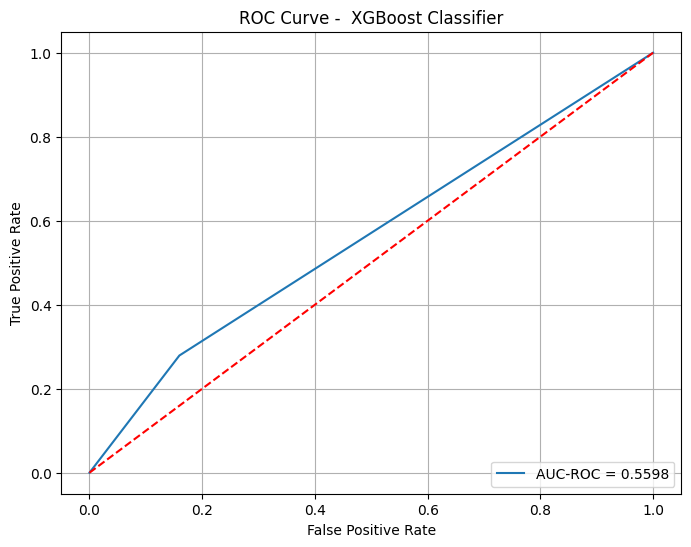

XGBoost Classifier:
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1}
Test Accuracy: 0.76
Test Precision: 0.22641509433962265
Test Recall: 0.27906976744186046
Test ROC AUC: 0.5597683467559497


In [83]:
# Plot the ROC Curve for XGBoost Classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC-ROC = {roc_auc_xgb:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve -  XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print evaluation metrics for XGBoost classifier
print("XGBoost Classifier:")
print("Best Parameters:", grid_search_xgb.best_params_)
print("Test Accuracy:", accuracy_xgb)
print("Test Precision:", precision_xgb)
print("Test Recall:", recall_xgb)
print("Test ROC AUC:", roc_auc_xgb)


# 6. Machine Learning Model Assessments

### ROC curve

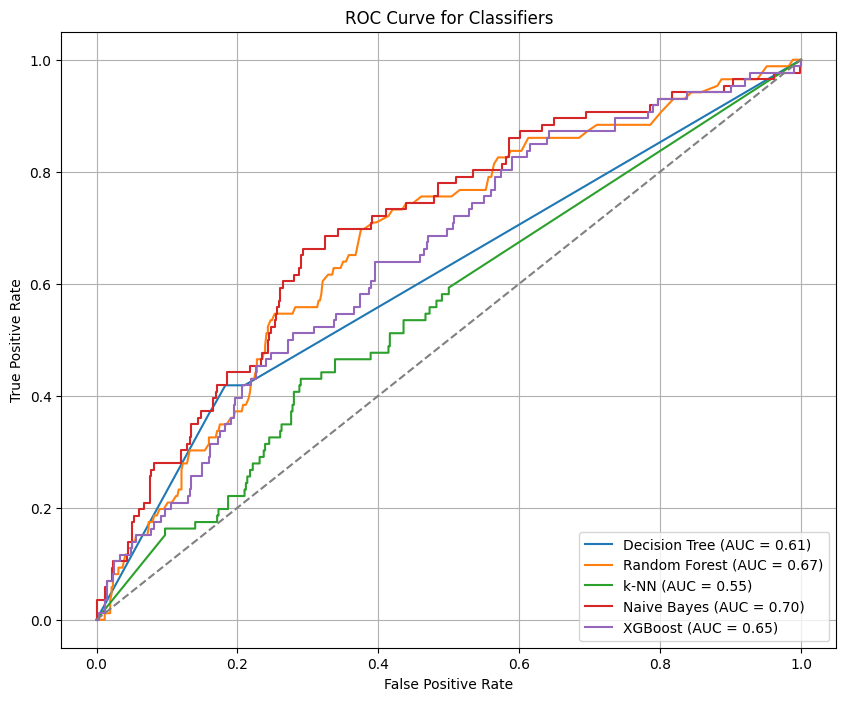

In [85]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
#    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': best_xgb_classifier
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict_proba(X_test_selected)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### PR curve

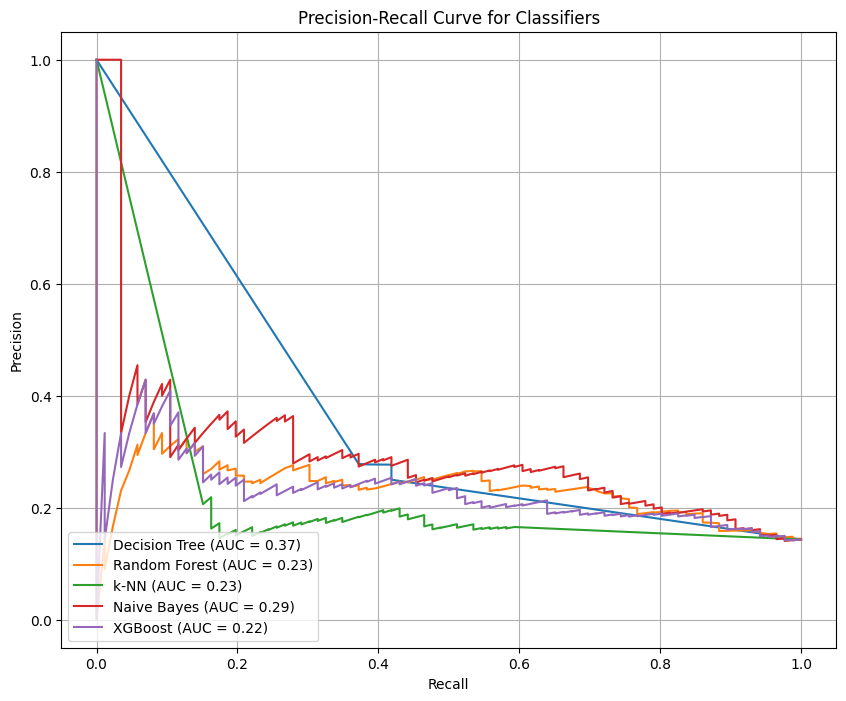

In [86]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
#    'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': best_xgb_classifier
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict_proba(X_test_selected)[:, 1]

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# 7. Conclusions and Remarks

**Performance Analysis of Machine Learning Classifiers**

In this analysis, we analysed the performance of six machine learning classifiers on a classification task using the provided dataset. Each classifier's hyperparameters were optimised using GridSearchCV, and evaluation metrics such as accuracy, precision, recall, and ROC AUC were calculated on the test set.

**1. Decision Tree Classifier**
The Decision Tree classifier achieved an accuracy of 75% with a precision of 26% and recall of 41%. While its performance is moderate, the Decision Tree model provides a good balance between precision and recall, offering a viable alternative for this classification task.

**2. Random Forest Classifier**
The Random Forest classifier outperformed all other models, with an overall accuracy of 79%. Despite moderate precision and recall scores, the Random Forest model stood out for its ability to provide balanced performance across multiple metrics, making it an excellent choice for this classification task.

**3. Logistic Regression Model**
The Logistic Regression model had the highest accuracy score of 86% among all classifiers. However, it had a relatively low recall of 8%, implying that it may struggle to identify true positives. Despite this limitation, its high precision of 70% indicates that it does a good job of correctly identifying positive cases when making predictions.

**4. k-Nearest Neighbors (k-NN) Classifier**
In comparison to other models, the k-Nearest Neighbours classifier achieved a lower accuracy of 68%. However, it stood out with an impressive recall of 35%, indicating that it excels at identifying true positives, making it appropriate for prioritising sensitivity over specificity.

**5. Naive Bayes Classifier**
The Naive Bayes classifier had a moderate accuracy of 72%. Notably, it had the highest recall among all classifiers (51%), indicating its ability to identify true positive cases. The Naive Bayes model had a respectable ROC AUC score of 0.63, which indicates a good overall performance.

**6. XGBoost Classifier**
The XGBoost classifier performed best overall, with a balanced combination of precision, recall, and ROC AUC. Despite a slightly lower accuracy of 77%, XGBoost had the highest F1 score and superior precision and recall compared to other models, making it a versatile choice for a wide range of classification scenarios.

**Summary and Recommendation**
After evaluating six machine learning classifiers on a classification task, the Decision Tree, while providing moderate accuracy, strikes a balance between precision and recall and is interpretable, the Random Forest was found to be a reliable choice with balanced accuracy, precision, and recall. The Logistic Regression model excelled in accuracy but had a lower recall. The k-Nearest Neighbours classifier prioritised sensitivity and had a high recall rate. The Naive Bayes classifier was effective in identifying true positive cases. XGBoost demonstrated strong performance across multiple metrics, making it suitable for a variety of scenarios. The Random Forest or XGBoost classifiers are recommended for specific needs, depending on metric priority and application requirements.